根据词频计算词云


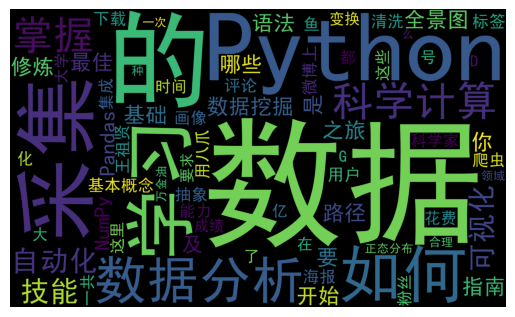

In [22]:
# test wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np
import pandas as pd

# create word cloud
def create_word_cloud(f):
    print('根据词频计算词云')
    text = " ".join(jieba.cut(f, cut_all=False, HMM=True))
    wc = WordCloud(
        font_path='./SimHei.ttf',
        max_words = 100,
        width=2000,
        height=1200
    )
    wordcloud = wc.generate(text)
    
    # 写词云图片
    wordcloud.to_file('wordcloud.jpg')
    
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# 去掉停用词
def remove_stop_words(f):
    stop_words=['学会','就是','什么']
    
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f
    
f = '数据分析全景图及修炼指南\学习数据挖掘的最佳学习路径是什么？\Python基础语法：开始你的Python之旅\Python科学计算：NumPy\Python科学计算：Pandas\学习数据分析要掌握哪些基本概念？\用户画像：标签化就是数据的抽象能力\数据采集：如何自动化采集数据？\数据采集：如何用八爪鱼采集微博上的“D&G”评论？\Python爬虫：如何自动化下载王祖贤海报？\数据清洗：数据科学家80%时间都花费在了这里？\数据集成：这些大号一共20亿粉丝？\数据变换：大学成绩要求正态分布合理么？\数据可视化：掌握数据领域的万金油技能\一次学会Python数据可视化的10种技能'
f = remove_stop_words(f)

create_word_cloud(f)

如果这都不算爱
慢慢
烦恼歌
吻别
遥远的她
饿狼传说
等你等到我心痛
只想一生跟你走
她来听我的演唱会
情书
一千个伤心的理由
你最珍贵
相爱很难
还是觉得你最好
每天爱你多一些
离人
我真的受伤了
相思风雨中
日出时让街灯安睡
旧情绵绵
回头太难
心如刀割
离开以后
李香兰 (2000年版)
一路上有你
只有你不知道
夕阳醉了
忘情冷雨夜
祝福
忘记你我做不到
爱很简单 (live)
月半弯
秋意浓
只愿一生爱一人
小城大事 (live)
听海 (live)
承诺(香港版)
我等到花儿也谢了
爱是永恒
你的名字 我的姓氏
雨夜的浪漫
头发乱了
咖啡
分手总要在雨天
情系半生
这么近(那么远)
你好毒
想和你去吹吹风
情网
爱你痛到不知痛
make word cloud
        李焯 雄 
       伍佰 
       Davy   Chan / 邓建明 
 是否 爱 就 得 忍耐   不问 该不该 
 都 怪 我 没 能耐   转身 走开 
 难道 牺牲 才 精彩   伤痛 才 实在 
 要 为 你 流下泪来   才 证明 是 爱 
 如果 这 都 不算 爱 
 我 有 什么 好 悲哀 
 谢谢 你 的 慷慨 
 是 我 自己 活该 
 如果 这 都 不算 爱 
 我 有 什么 好 悲哀 
 你 只要 被 期待 
 不要 真正 去 爱   OH   NO 
 还要 怎样 的 表白   才 不算 独白 
 都 怪 我 没 能耐   转身 走开 
 难道 牺牲 才 精彩   伤痛 才 实在 
 要 为 你 流下泪来   才 证明 是 爱 
 你 的 感情 太易 割爱 
 把 未来 转眼 就 删改 
 我 的 心 却 为 你 空白 了 一块 
 如果 这 都 不算 爱 
 我 有 什么 好 悲哀 
 谢谢 你 的 慷慨 
 是 我 自己 活该 
 如果 这 都 不算 爱 
 我 有 什么 好 悲哀 
 你 要 的 是 崇拜 
 并 不是 谁 的 爱   OH   NO 
         白进法 
       林隆璇 
       吴庆隆 
 心   慢慢 疼   慢慢 冷 
 慢慢 等 不到 爱人 
 付出 一生   收回 几成 
 情   不能 分   不能 恨 
 不能 太 轻易 信任 
 真 爱 一回   尽 是 伤痕 
 泪   慢慢 流 

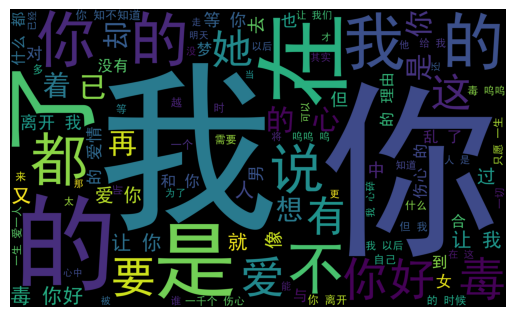

In [25]:
# download lyric from 163 music, and make word cloud
import requests
import sys
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np
from lxml import etree

headers = {
    'Referer': 'http://music.163.com',
    'Host': 'music.163.com',
    'Accept': 'text/html, application/xhtml+xml, application/xml; q=0.9, image/webp, image/apng, */*;q=0.8',
    'User-Agent': 'Chrome/10'
}

# get someone lyric
def get_song_lyric(headers, lyric_url):
    res = requests.request('GET', lyric_url, headers = headers)
    if 'lrc' in res.json():
        lyric = res.json()['lrc']['lyric']
        new_lyric = re.sub(r'[\d:.[\]]', '', lyric)
        return new_lyric
    else:
        return ''

# drop stop word
def remove_stop_words(f):
    stop_words = ['作词', '作曲', '编曲', 'Arranger', '录音', '混音', '人声', 'Vocal', '弦乐', 'Keyboard', '键盘', '编辑', '助理', 'Assistants', 'Mixing', 'Editing', 'Recording', '音乐', '制作', 'Producer', '发行', 'produced', 'and', 'distributed']
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f
    pass

# make word cloud
def create_word_cloud(f):
    print('make word cloud')
    f = remove_stop_words(f)
    cut_text = ' '.join(jieba.cut(f, cut_all=False, HMM = True))
    wc = WordCloud(
        font_path = './SimHei.ttf',
        max_words = 100,
        width = 2000,
        height = 1200
    )
    print(cut_text)
    wordcloud = wc.generate(cut_text)

    # draw cloud image
    wordcloud.to_file('wordcloud.jpg')

    # show the image file
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

# get author page, the best hot 50 song's id , song's name
def get_songs(artist_id):
    page_url = 'https://music.163.com/artist?id=' + artist_id

    # get page html
    res = requests.request('GET', page_url, headers = headers)

    # use XPath
    html = etree.HTML(res.text)
    href_xpath = "//*[@id='hotsong-list']//a/@href"
    name_xpath = "//*[@id='hotsong-list']//a/text()"
    hrefs = html.xpath(href_xpath)
    names = html.xpath(name_xpath)

    # set song's id, song's name
    song_ids = []
    song_names = []

    for href, name in zip(hrefs, names):
        song_ids.append(href[9:])
        song_names.append(name)

    return song_ids, song_names

# set author id
artist_id = '6460'
[song_ids, song_names] = get_songs(artist_id)

# all lyric
all_word = ''

# get every song lyric
for (song_id, song_name) in zip(song_ids, song_names):
    # lyric api url
    lyric_url = 'http://music.163.com/api/song/lyric?os=pc&id=' + song_id + '&lv=-1&kv=-1&tv=-1'
    lyric = get_song_lyric(headers, lyric_url)
    all_word = all_word + ' ' + lyric
    print(song_name)

# make word cloud
create_word_cloud(all_word)